In [1]:
from agents import Agent, RandomAgent, HumanInput, EndAgent, RLAgent
from states import GameState, TOAD, FROG, BLANK
from game import run_game_loop, simulate_many_games, plot_losses

import random as rand
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import time


In [2]:
initial_position = [TOAD] * 6 + [BLANK] * 9 + [FROG] * 6
G = GameState(initial_position, starting_player=TOAD)

In [5]:
rl_agent = RLAgent(G, TOAD, agent_name='toad_rl', filename='toad_rl10610.pth', batch_size=128, lr=1e-4, target_update_freq=20)
random_frog = RandomAgent(G, FROG)

Training toad_rl 0.0% complete...
Training toad_rl 10.0% complete...
Training toad_rl 20.0% complete...
Training toad_rl 30.0% complete...
Training toad_rl 40.0% complete...
Training toad_rl 50.0% complete...
Training toad_rl 60.0% complete...
Training toad_rl 70.0% complete...
Training toad_rl 80.0% complete...
Training toad_rl 90.0% complete...
Training finished!


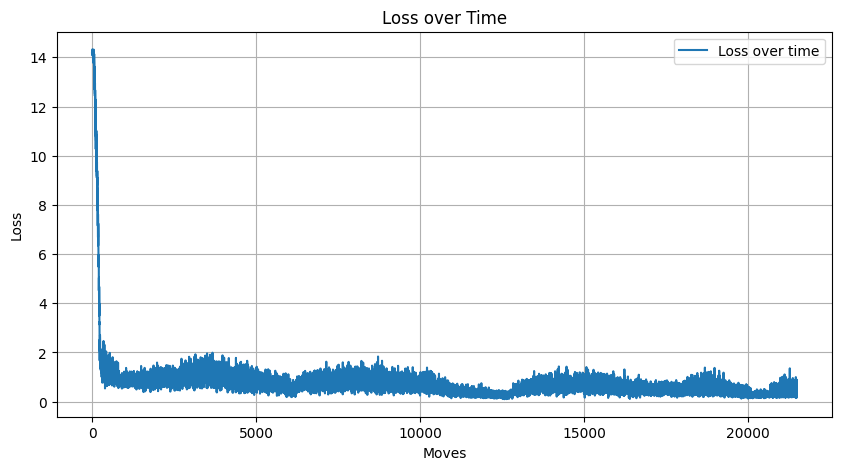

In [6]:
losses = rl_agent.train(opponent=random_frog, num_episodes=2000, save_model=True, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses)

tensor([[ -1.9037,  -3.4021,  -7.5018, -16.1072, -18.1522, -15.0227, -15.1415,
         -17.1580]])
1
tensor([[ -2.1977,  -2.1762,  -6.9959, -15.9472, -18.5990, -14.8631, -15.2700,
         -17.0043]])
2
tensor([[ -2.5648,  -3.9126,  -8.8464, -16.2403, -17.5095, -14.9825, -15.1766,
         -17.1139]])
1
tensor([[ -2.9623,  -4.1481,  -8.4767, -14.5587, -16.2460, -14.2587, -14.4224,
         -16.3423]])
1
tensor([[ -6.8447,  -4.0445,  -6.9417, -11.8259, -15.4400, -13.9416, -14.3869,
         -15.8585]])
2
tensor([[ -5.0842,  -5.8959,  -9.6760, -13.6660, -15.0073, -14.0999, -14.5422,
         -16.5357]])
1
tensor([[ -8.5191,  -6.5388,  -7.3525, -12.4381, -14.8322, -14.4814, -14.4632,
         -16.4716]])
2
tensor([[-10.2222,  -7.6714,  -7.1361, -10.1500, -13.6188, -14.1270, -14.1696,
         -16.1984]])
3
tensor([[-15.4025,  -9.9889,  -8.1535,  -8.1477, -11.2049, -13.7669, -13.7540,
         -15.9137]])
4
tensor([[ -9.9553,  -9.6116,  -9.4346, -11.8089, -13.5344, -14.4077, -14.7138,
   

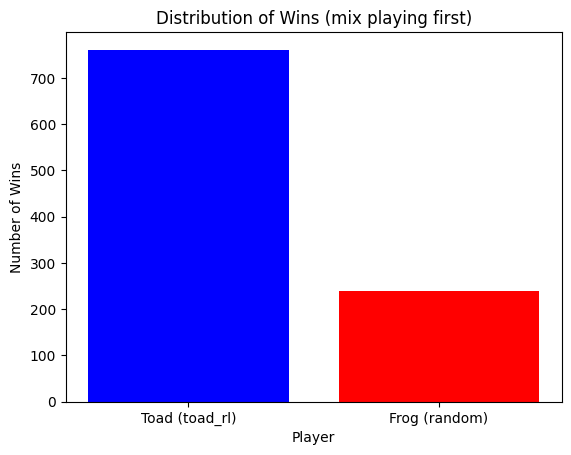

In [7]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, rl_agent, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

In [8]:
run_game_loop(G, rl_agent, random_frog, verbose=True)

Initializing game between toad_rl as Toads and random as Frogs...
|T|T|T|T|T|T|T|T| | | | | | |F|F|F|F|F|F|F|F|
tensor([[ -1.9037,  -3.4021,  -7.5018, -16.1072, -18.1522, -15.0227, -15.1415,
         -17.1580]])
1
toad_rl makes move 1
|T|T|T|T|T|T|T| |T| | | | | |F|F|F|F|F|F|F|F|
random makes move 1
|T|T|T|T|T|T|T| |T| | | | |F| |F|F|F|F|F|F|F|
tensor([[ -2.1977,  -2.1762,  -6.9959, -15.9472, -18.5990, -14.8631, -15.2700,
         -17.0043]])
2
toad_rl makes move 2
|T|T|T|T|T|T| |T|T| | | | |F| |F|F|F|F|F|F|F|
random makes move 2
|T|T|T|T|T|T| |T|T| | | | |F|F| |F|F|F|F|F|F|
tensor([[ -2.5834,  -3.8529,  -8.8073, -16.2877, -17.5468, -14.9009, -15.2641,
         -17.1601]])
1
toad_rl makes move 1
|T|T|T|T|T|T| |T| |T| | | |F|F| |F|F|F|F|F|F|
random makes move 1
|T|T|T|T|T|T| |T| |T| | |F| |F| |F|F|F|F|F|F|
tensor([[ -2.9623,  -4.1481,  -8.4767, -14.5587, -16.2460, -14.2587, -14.4224,
         -16.3423]])
1
toad_rl makes move 1
|T|T|T|T|T|T| |T| | |T| |F| |F| |F|F|F|F|F|F|
random makes m

False

# I play the trained agent

In [7]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, rl_agent, me, verbose=True)

Initializing game between rl as Toads and logan as Frogs...
|T|T| | | | |F|F|
tensor([[  4.2764, -15.4229]])
1
rl makes move 1
|T| |T| | | |F|F|
logan makes move 1
|T| |T| | |F| |F|
tensor([[4.7605, 4.7198]])
1
rl makes move 1
|T| | |T| |F| |F|
logan makes move 1
|T| | |T|F| | |F|
tensor([[4.8089, 5.3481]])
2
rl makes move 2
| |T| |T|F| | |F|
logan makes move 2
| |T| |T|F| |F| |
tensor([[ 5.8699, -9.5158]])
1
rl makes move 1
| |T| | |F|T|F| |
logan makes move 1
| |T| |F| |T|F| |
tensor([[-6.9815,  6.5090]])
2
rl makes move 2
| | |T|F| |T|F| |
logan makes move 1
| |F|T| | |T|F| |
tensor([[-6.3388,  7.4428]])
2
rl makes move 2
| |F| |T| |T|F| |
logan makes move 2
| |F| |T|F|T| | |
tensor([[ 7.3724, -0.9963]])
1
rl makes move 1
| |F| |T|F| |T| |
logan makes move 1
|F| | |T|F| |T| |
tensor([[ 8.1394, -7.0894]])
1
rl makes move 1
|F| | |T|F| | |T|
logan makes move 2
|F| |F|T| | | |T|
tensor([[-17.4235,   9.0417]])
2
rl makes move 2
|F| |F| |T| | |T|
logan makes move 2
|F|F| | |T| | |T|
tens

True

It beat me...

# Train a Frog agent for the same amount of time against a random opponent

In [ ]:
H = GameState(initial_position, FROG)

In [ ]:
rl_agent2 = RLAgent(H, TOAD, agent_name='frog_rl', filename='frog_rl10610.pth', batch_size=256)
random_toad = RandomAgent(H, TOAD)

In [ ]:
losses2 = rl_agent2.train(opponent=random_toad, num_episodes=5000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses2)

In [ ]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

In [ ]:
run_game_loop(H, random_toad, rl_agent2, verbose=True)

# Train new models by playing the previously trained ones

In [13]:
print(run_game_loop(G, rl_agent, rl_agent2, verbose=True))
print(run_game_loop(G, rl_agent, rl_agent2, verbose=True))

Initializing game between toad_rl as Toads and frog_rl as Frogs...
|T|T|T|T| | | | |F|F|F|F|
tensor([[  3.7793,  -9.6575, -14.6727, -16.4982]])
1
toad_rl makes move 1
|T|T|T| |T| | | |F|F|F|F|
tensor([[  3.5696,  -2.0836, -15.7748, -18.5324]])
1
frog_rl makes move 1
|T|T|T| |T| | |F| |F|F|F|
tensor([[  4.2121,   4.0020, -14.6011, -14.9939]])
1
toad_rl makes move 1
|T|T|T| | |T| |F| |F|F|F|
tensor([[  3.8609,  -8.0464, -13.5447, -17.8694]])
1
frog_rl makes move 1
|T|T|T| | |T|F| | |F|F|F|
tensor([[  4.7020,   2.9805, -17.3077, -15.2331]])
1
toad_rl makes move 1
|T|T|T| | | |F|T| |F|F|F|
tensor([[  2.6943,  -5.2158,  -4.2002, -13.4776]])
1
frog_rl makes move 1
|T|T|T| | |F| |T| |F|F|F|
tensor([[-13.3780,   5.0314,  -2.3854, -18.9982]])
2
toad_rl makes move 2
|T|T| |T| |F| |T| |F|F|F|
tensor([[  2.4167,   0.1331,  -1.5536, -11.9732]])
1
frog_rl makes move 1
|T|T| |T|F| | |T| |F|F|F|
tensor([[-11.8527,   5.6052,   5.3939, -17.4724]])
2
toad_rl makes move 2
|T|T| | |F|T| |T| |F|F|F|
tensor(

toad_rl losses for epoch 0


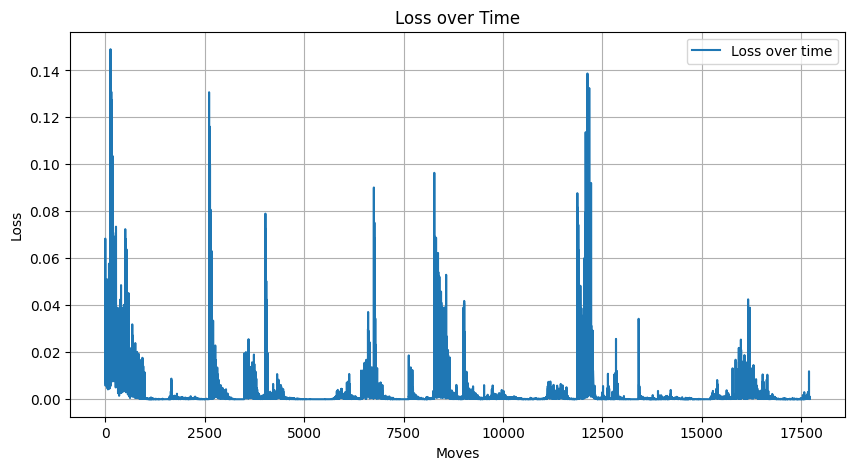

frog_rl losses for epoch 0


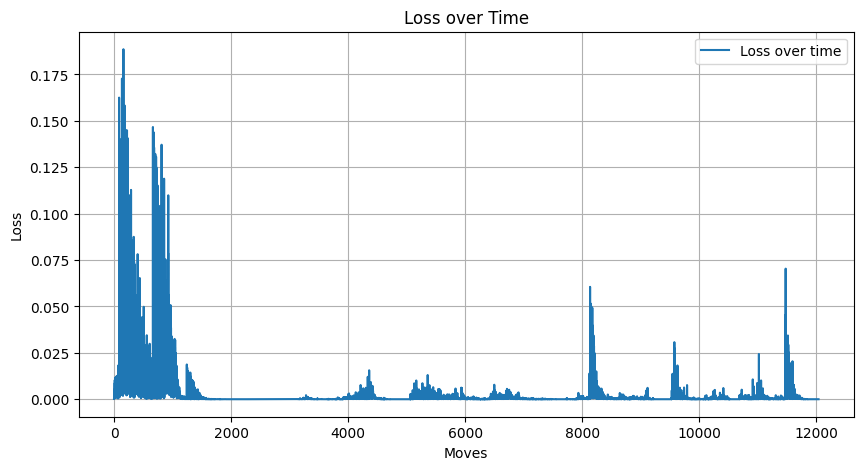

toad_rl losses for epoch 1


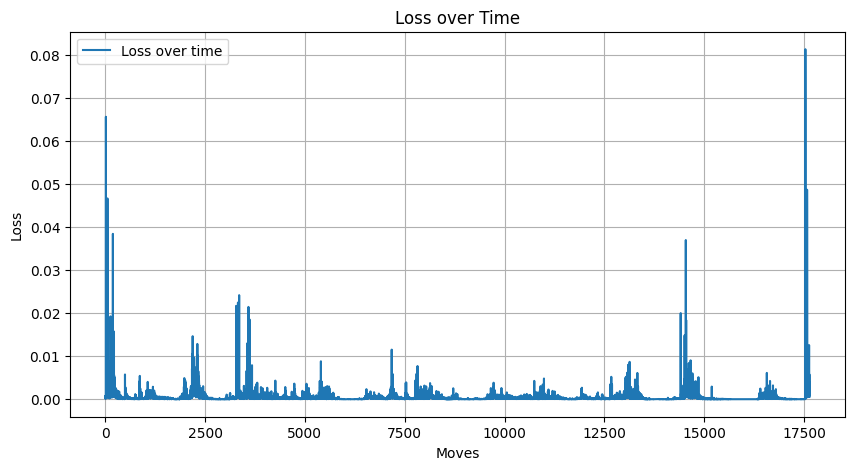

frog_rl losses for epoch 1


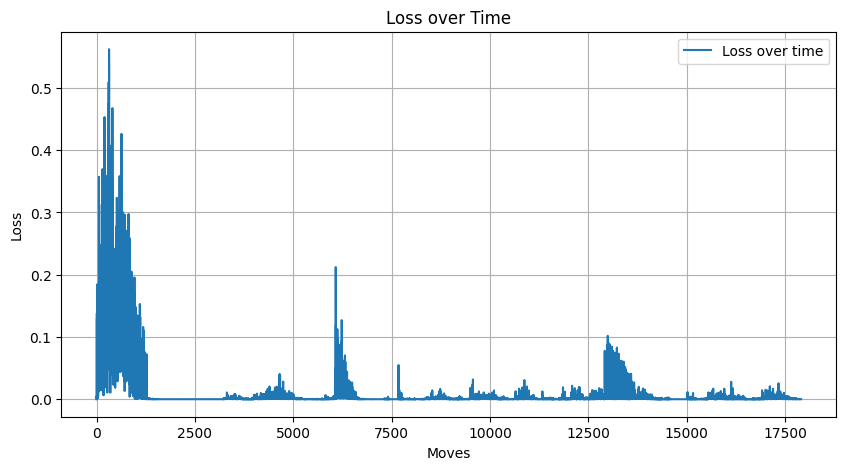

toad_rl losses for epoch 2


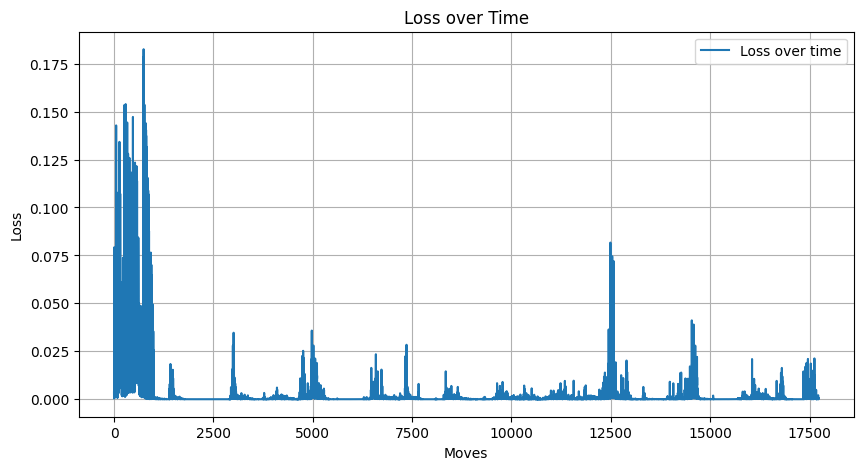

frog_rl losses for epoch 2


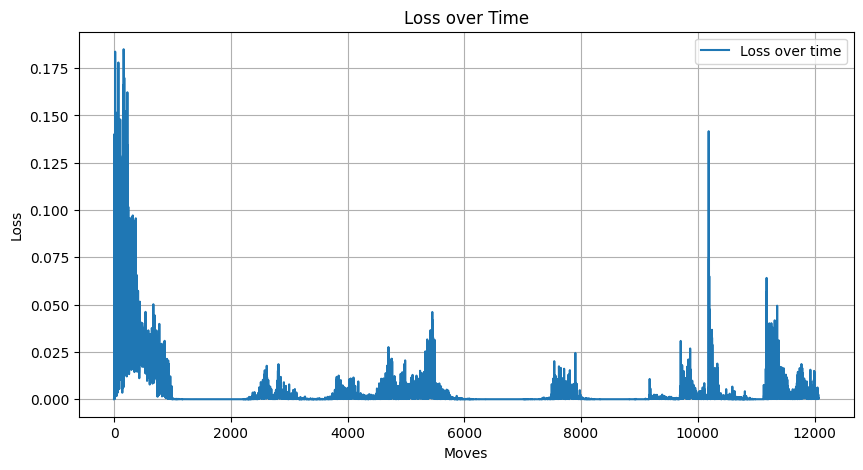

toad_rl losses for epoch 3


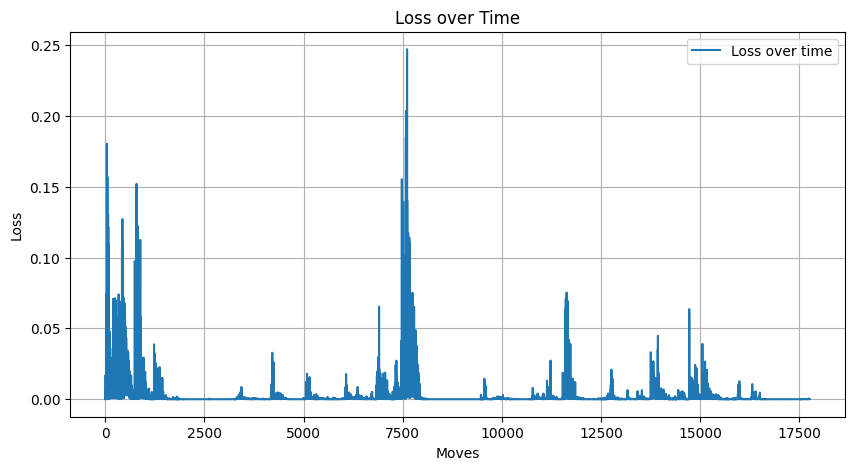

frog_rl losses for epoch 3


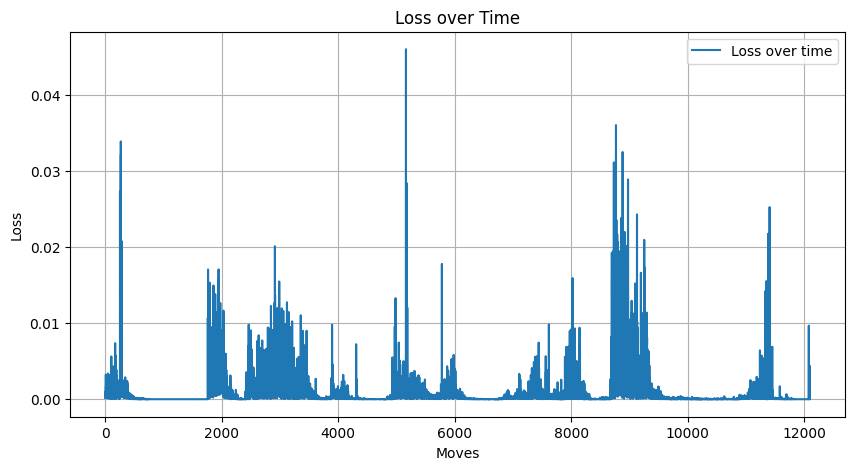

toad_rl losses for epoch 4


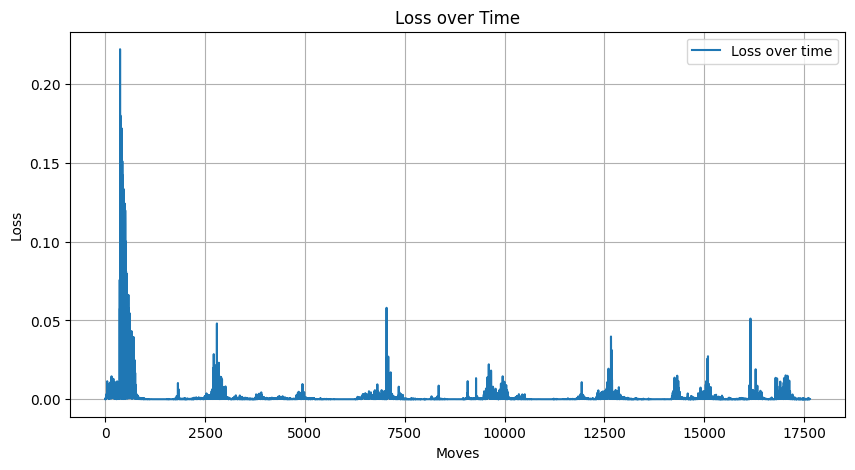

frog_rl losses for epoch 4


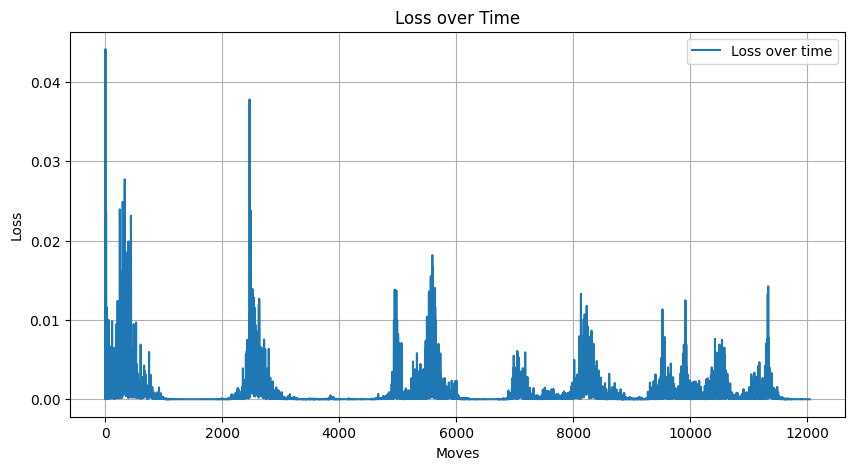

toad_rl losses for epoch 5


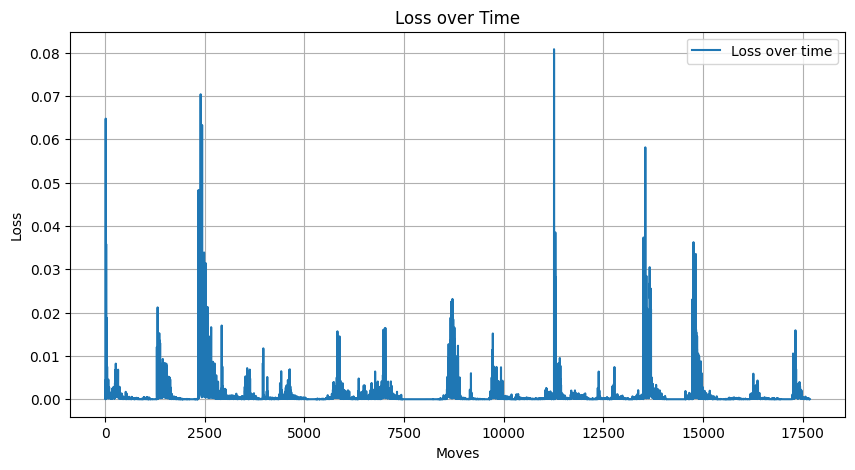

frog_rl losses for epoch 5


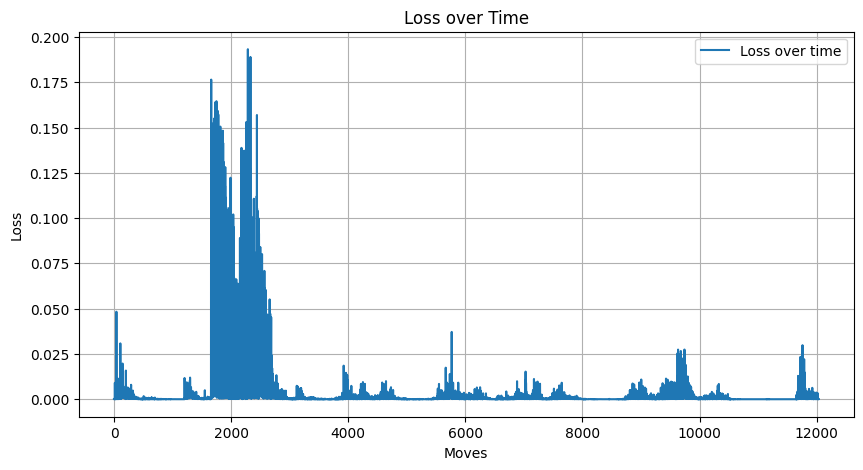

toad_rl losses for epoch 6


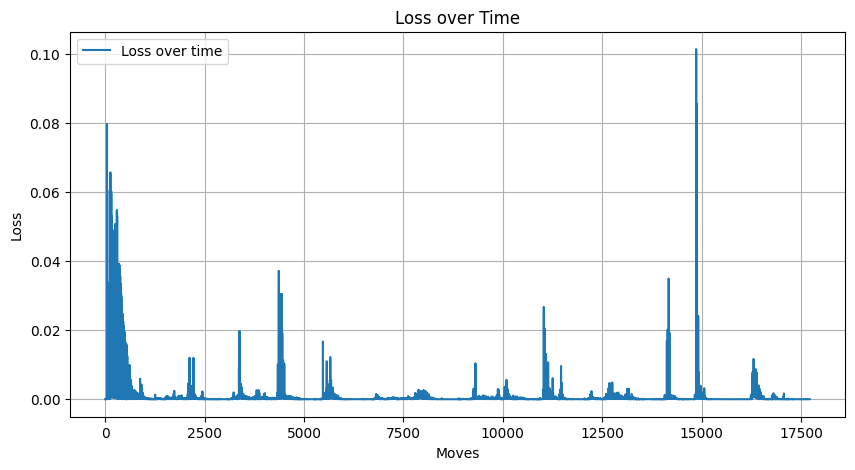

frog_rl losses for epoch 6


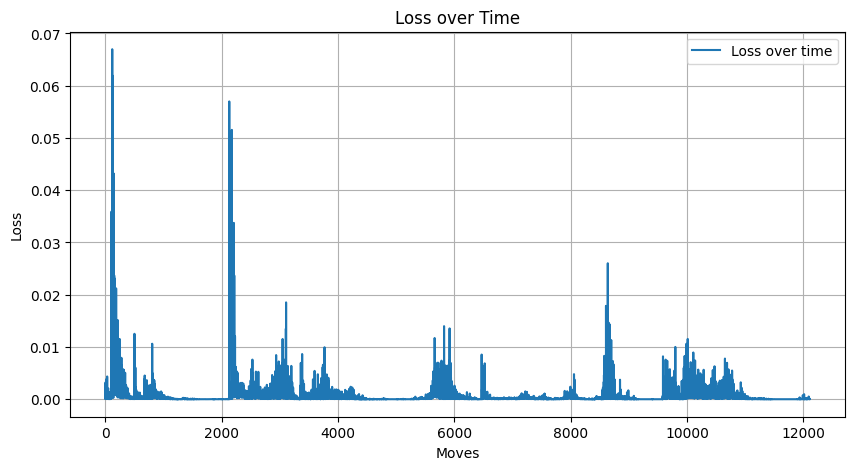

toad_rl losses for epoch 7


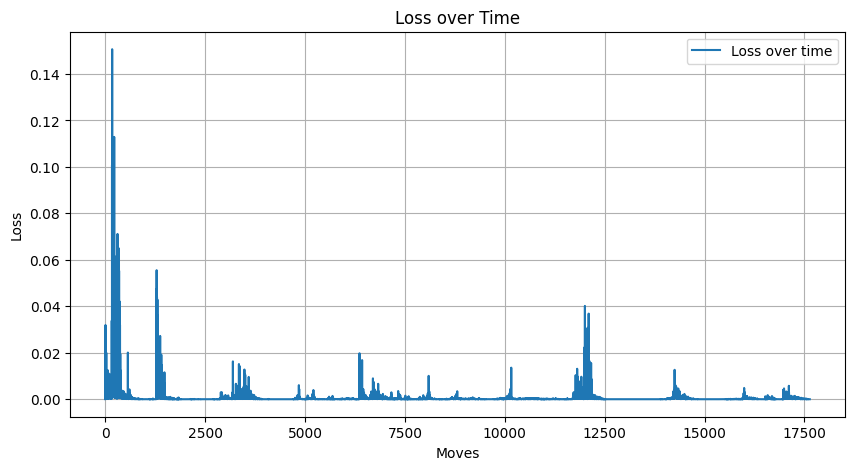

frog_rl losses for epoch 7


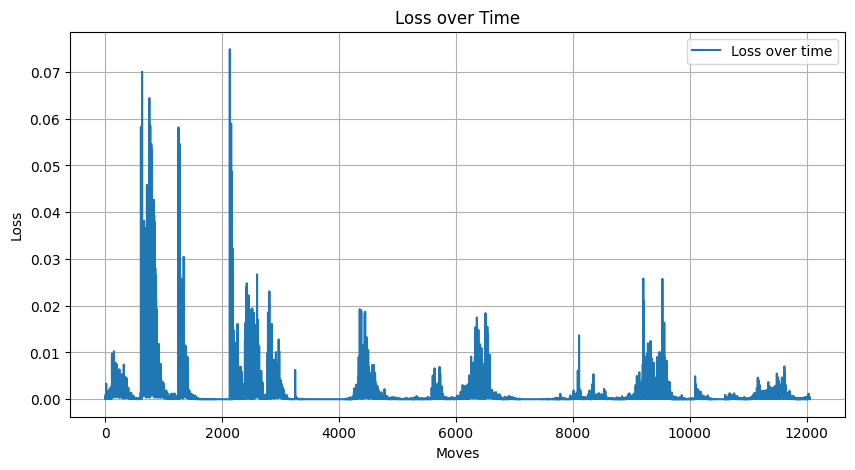

toad_rl losses for epoch 8


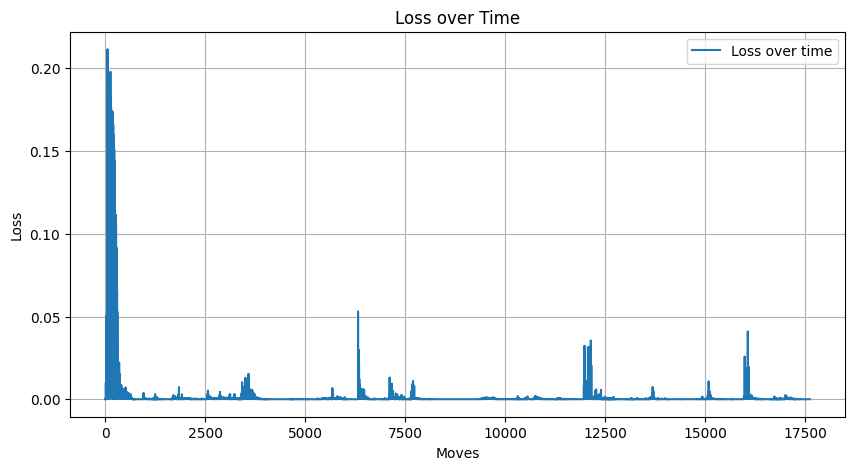

frog_rl losses for epoch 8


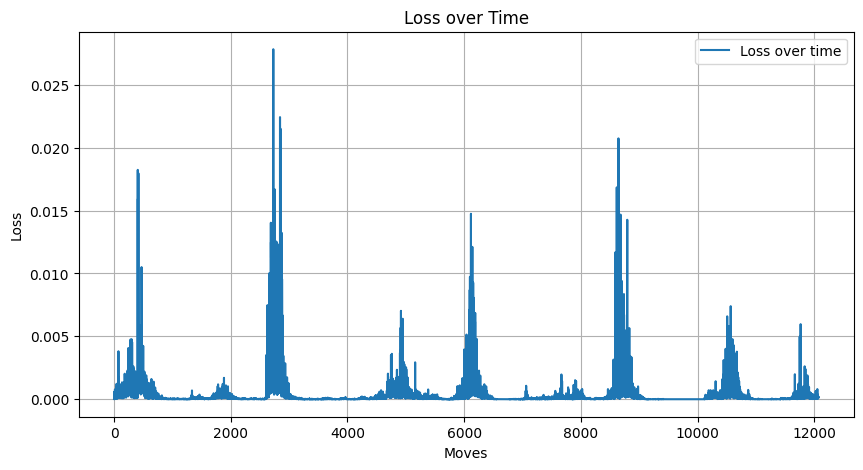

toad_rl losses for epoch 9


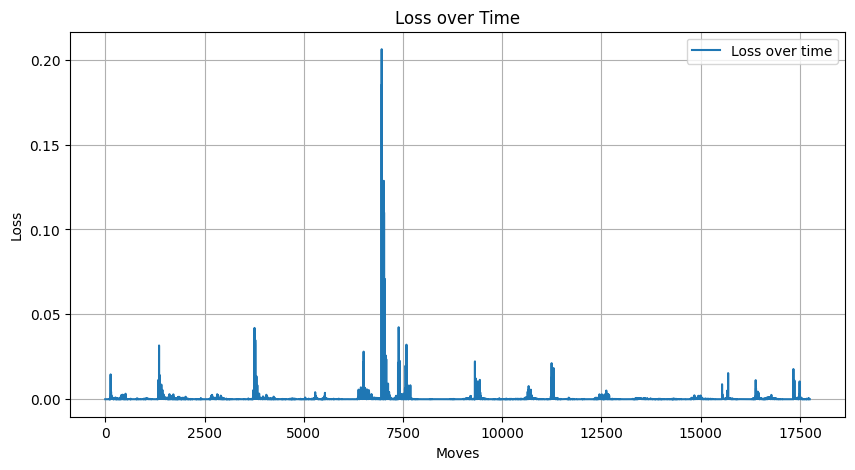

frog_rl losses for epoch 9


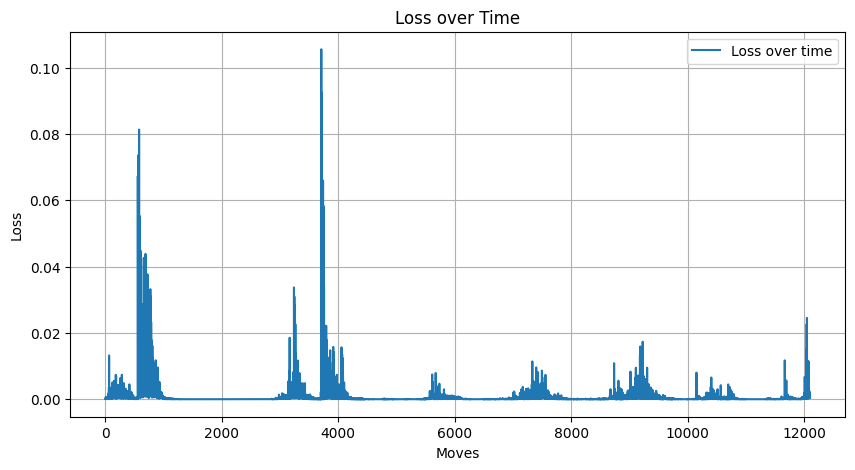

In [16]:
num_epochs = 5
# an epoch is a training session of both toad and frog
for epoch in range(num_epochs):
    losses = rl_agent.train(opponent=rl_agent2, num_episodes=2000, save_model=True, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{rl_agent.agent_name} losses for epoch {epoch}")
    plot_losses(losses)

    losses2 = rl_agent2.train(opponent=rl_agent, num_episodes=2000, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{rl_agent2.agent_name} losses for epoch {epoch}")
    plot_losses(losses2)
    

Toads won 500 games (50.0%)
Frogs won 500 games (50.0%)


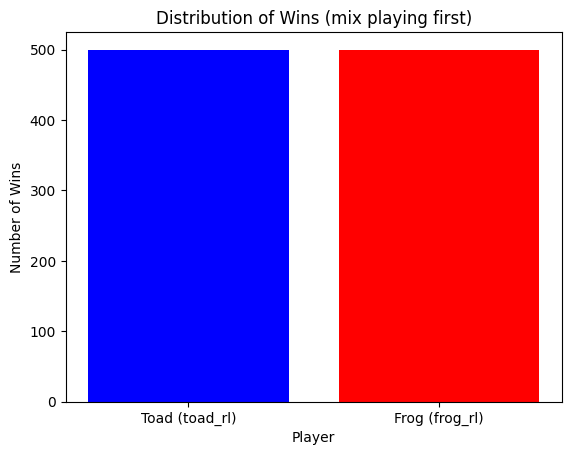

In [17]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, rl_agent, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

In [ ]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, rl_agent, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

Toads won 659 games (65.9%)
Frogs won 341 games (34.1%)


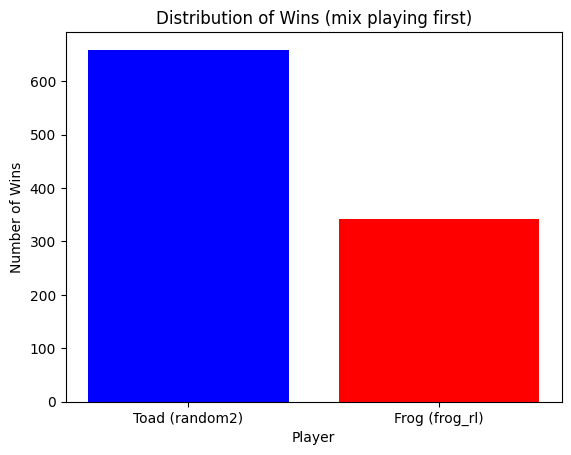

In [28]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

In [20]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(H, rl_agent, me)

Initializing game between toad_rl as Toads and logan as Frogs...
|T|T| | | | |F|F|
toad_rl makes move 1
|T| |T| | | |F|F|
logan makes move 1
|T| |T| | |F| |F|
toad_rl makes move 2
| |T|T| | |F| |F|
logan makes move 1
| |T|T| |F| | |F|
toad_rl makes move 1
| |T| |T|F| | |F|
logan makes move 2
| |T| |T|F| |F| |
toad_rl makes move 1
| |T| | |F|T|F| |
logan makes move 1
| |T| |F| |T|F| |
toad_rl makes move 2
| | |T|F| |T|F| |
logan makes move 1
| |F|T| | |T|F| |
toad_rl makes move 1
| |F|T| | | |F|T|
logan makes move 2
| |F|T| | |F| |T|
toad_rl makes move 2
| |F| |T| |F| |T|
logan makes move 2
| |F| |T|F| | |T|
toad_rl makes move 2
| |F| | |F|T| |T|
logan makes move 1
|F| | | |F|T| |T|
toad_rl makes move 2
|F| | | |F| |T|T|
logan makes move 2
|F| | |F| | |T|T|
logan playing as Frogs wins in 18 moves!


False

For some reason the agents playing against each other became worse than random.